In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
sys.path.append(os.path.abspath("src"))


In [8]:
# Load the dataset
def load_data(filepath):
    return pd.read_csv(filepath)

# Compute sentiment scores
def compute_sentiment(df, text_col="headline"):
    df[text_col] = df[text_col].astype(str)
    df["Polarity"] = df[text_col].apply(lambda x: TextBlob(x).sentiment.polarity)
    df["Subjectivity"] = df[text_col].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    return df

# Filter news for a specific company
def filter_company_news(df, company_name):
    return df[df["headline"].str.contains(company_name, case=False, na=False)]

# Summarize sentiment
def summarize_sentiment(df):
    return {
        "average_polarity": df["Polarity"].mean(),
        "average_subjectivity": df["Subjectivity"].mean(),
        "most_positive": df.loc[df["Polarity"].idxmax()]["headline"],
        "most_negative": df.loc[df["Polarity"].idxmin()]["headline"],
    }


In [11]:
# Load the dataset
def load_data(filepath):
    return pd.read_csv(filepath)

# Compute sentiment scores
def compute_sentiment(df, text_col="headline"):
    df[text_col] = df[text_col].astype(str)
    df["Polarity"] = df[text_col].apply(lambda x: TextBlob(x).sentiment.polarity)
    df["Subjectivity"] = df[text_col].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    return df

# Filter news for a specific company
def filter_company_news(df, company_name):
    return df[df["headline"].str.contains(company_name, case=False, na=False)]

# Summarize sentiment
def summarize_sentiment(df):
    return {
        "average_polarity": df["Polarity"].mean(),
        "average_subjectivity": df["Subjectivity"].mean(),
        "most_positive": df.loc[df["Polarity"].idxmax()]["headline"],
        "most_negative": df.loc[df["Polarity"].idxmin()]["headline"],
    }


In [13]:
os.chdir("..")  # Go up a directory
#print(os.getcwd())

In [17]:
#print(os.getcwd())

In [15]:
# Path to your data
csv_file = "Data/raw_analyst_ratings.csv"
df = load_data(csv_file)

In [16]:
# Compute sentiment
df = compute_sentiment(df)

# Companies to analyze
companies = ["AAPL", "GOOG", "AMZN", "TSLA", "MSFT"]


Sentiment summary for AAPL:
average_polarity: 0.07207611832611832
average_subjectivity: 0.26088059539330727
most_positive: Barron’s Picks 30 Best CEOs (ORCL, NFLX, F, CMI, AAPL)
most_negative: Benzinga's Worst Performing Industries (RGC, GNW, LFC, HSIC, DELL, AAPL, PWER, ESIO)


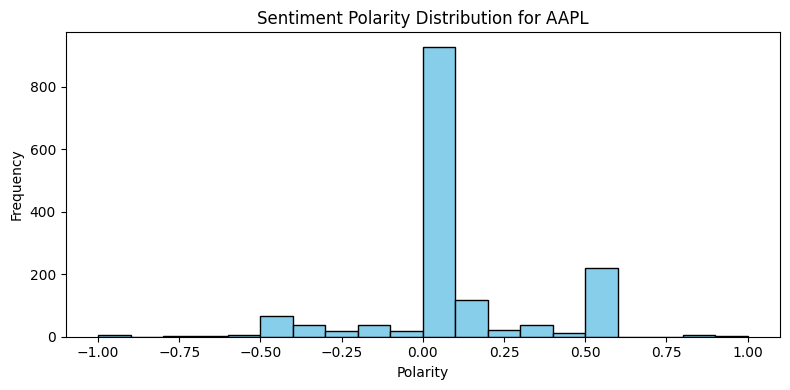


Sentiment summary for GOOG:
average_polarity: 0.051008276474468275
average_subjectivity: 0.20162260310348054
most_positive: Google, Facebook, Amazon And Priceline Remain JPMorgan's Best Internet Ideas
most_negative: Where Would Apple And Google Rank In Terms Of World's Richest Countries?


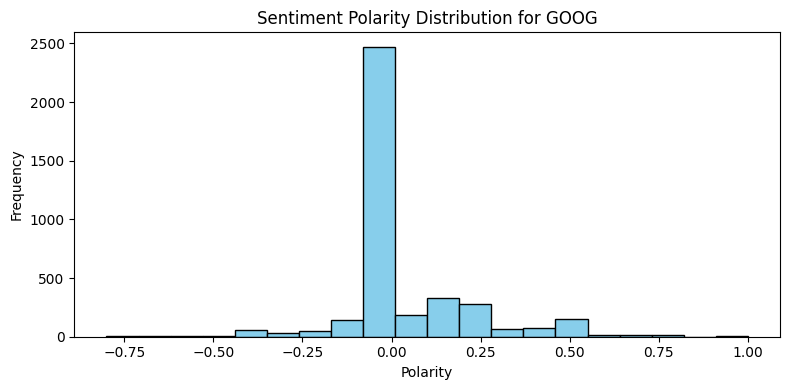


Sentiment summary for AMZN:
average_polarity: 0.11878844888559914
average_subjectivity: 0.22904104890503854
most_positive: In-Depth Analysis: Best Buy (BBY, AMZN, WMT, BKS, BGP)
most_negative: Cramer’s Calls On Mad Money (V, PFE, AMZN, BAC, APOL)


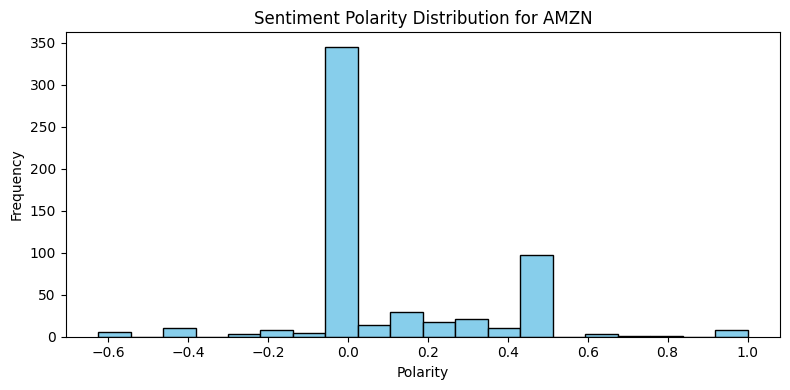


Sentiment summary for TSLA:
average_polarity: 0.1763076745371698
average_subjectivity: 0.3322982187808686
most_positive: UBS Says 5 Most Shorted Stocks On Monday Were TSLA, CAT, NFLX, AA, & BABA According To Client Concentration
most_negative: 'Per $TSLA, these 8 pages of comprehensive NHTSA investigative demands NHTSA constitute a mere "request for information"...Tesla has used this language to hide subpoenas as well...' -Tweet From Stanphyl Capital's Mark Spiegel


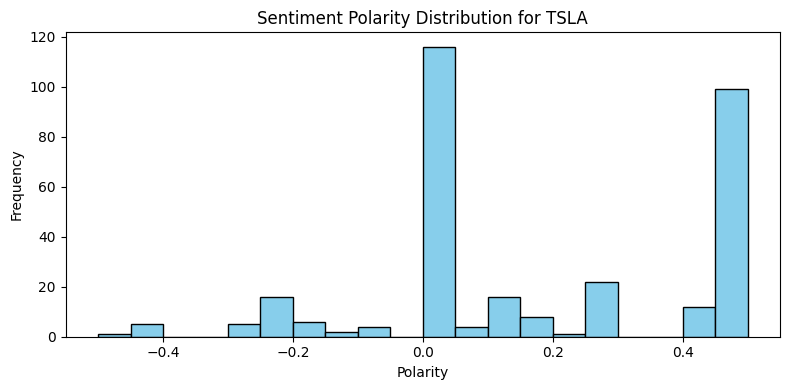


Sentiment summary for MSFT:
average_polarity: 0.10042549377705627
average_subjectivity: 0.2732327967171717
most_positive: Jefferies Names Best Values in Technology Market (MSFT, CHKP)
most_negative: GMO Crops Aren't Evil, Whether Monsanto is or Not (MSFT, MON, DD, DOW)


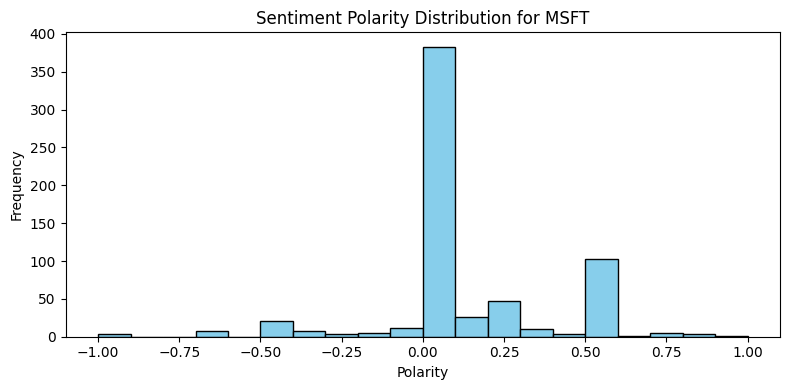

In [18]:
# Run sentiment analysis for each company
for company in companies:
    print(f"\nSentiment summary for {company}:")
    filtered_df = filter_company_news(df, company)
    summary = summarize_sentiment(filtered_df)
    for k, v in summary.items():
        print(f"{k}: {v}")

    # Plot sentiment distribution
    plt.figure(figsize=(8, 4))
    plt.hist(filtered_df["Polarity"], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Sentiment Polarity Distribution for {company}")
    plt.xlabel("Polarity")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()